### Imports

In [1]:
import sys
sys.path.insert(0, './utilities')
from v_nn_utilities import TD_Delta, Policy, vals_at_states, hrr, random, copy, np
import matplotlib.pyplot as plt

### Hyperparameters

In [2]:
#Constants
ALPHA = 1    #learning rate
GAMMA = 0.5    #discount

num_states = 51
goal_index = (num_states//2) +1
num_episodes = 1000

#User-entered variables
#num_states = int(input("Enter the number of states in the maze: "))
#goal_index = int(input("Enter the index of the goal state: ")) 
#num_episodes = int(input("Enter the number of episodes: "))



### Setup

In [3]:
#States
# make num_states dimensional list of hrrs, where each hrr has 10 * num_states elements 
states = hrr.hrrs(10*num_states, num_states, True) #normalized is unitary better for convergence

#Rewards and Weights
r = [0 for x in range(num_states)] #rewards
r[goal_index] = 1 #init val at index of goal state to be 1
weights = hrr.hrr(10*num_states, True)

#Possible starting positions
pos_indices = [x for x in range(num_states)]

### Main

In [4]:

for episode_number in range(num_episodes):
	goal_state = False
	pos = random.choice(pos_indices) #starting pos

	#update weights with nn that approximates v(s)
#	while not goal_state:	

	for i in range(100):
		next_pos = Policy(pos, weights, num_states, states)	
		weights, goal_state = TD_Delta( weights, r[pos], pos, goal_state, next_pos, states, GAMMA, ALPHA, goal_index )

		if goal_state:
			break

		pos = next_pos


### Output

[2.4353091321316356e-08, 2.891908668090082e-08, 5.33961626025814e-08, 1.217286680343932e-07, 2.3815352367950737e-07, 4.773974705551964e-07, 9.538453522583978e-07, 1.9078134327887852e-06, 3.8144452199073697e-06, 7.629502127626253e-06, 1.5258978702470394e-05, 3.051783235163974e-05, 6.103483657149411e-05, 0.0001220698778767737, 0.0002441408492558361, 0.0004882819507902036, 0.0009765623243835897, 0.001953125435428249, 0.0039062495495302274, 0.00781250003160916, 0.015625000490783192, 0.031249999480738144, 0.06250000010702172, 0.12499999975302933, 0.25000000039801606, 0.4999999998283424, 1.0, 0.49999999993641864, 0.25000000001225, 0.12499999963583841, 0.06249999938778528, 0.03124999989943622, 0.015624999611429491, 0.007812499822659191, 0.003906249645468818, 0.0019531248354771602, 0.0009765619083359489, 0.0004882809200398297, 0.00024414087382496064, 0.00012207029845123785, 6.1035128834929786e-05, 3.0516990778495234e-05, 1.5258716829946728e-05, 7.629358039884515e-06, 3.8141820588588615e-06, 1.

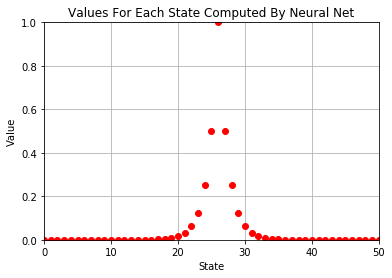

In [10]:
values = vals_at_states(weights, states)
print(values)

plt.xlabel("State")
plt.ylabel("Value")
plt.title("Values For Each State Computed By Neural Net")

plt.plot(list(range(51)), values, 'ro')

plt.axis([0, num_states-1, 0, 1])
plt.grid(True)


plt.show()
